In [56]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

import mglearn

import numpy as np

import matplotlib.pyplot as plt

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

scaler = MinMaxScaler().fit(X_train)

In [4]:
X_train_scaled = scaler.transform(X_train)

svm = SVC()
svm.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

svm.score(X_test_scaled, y_test)

0.972027972027972

In [6]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [7]:
grid.best_score_

0.9812311901504789

In [8]:
grid.score(X_test_scaled, y_test)

0.972027972027972

In [9]:
grid.best_params_

{'C': 1, 'gamma': 1}

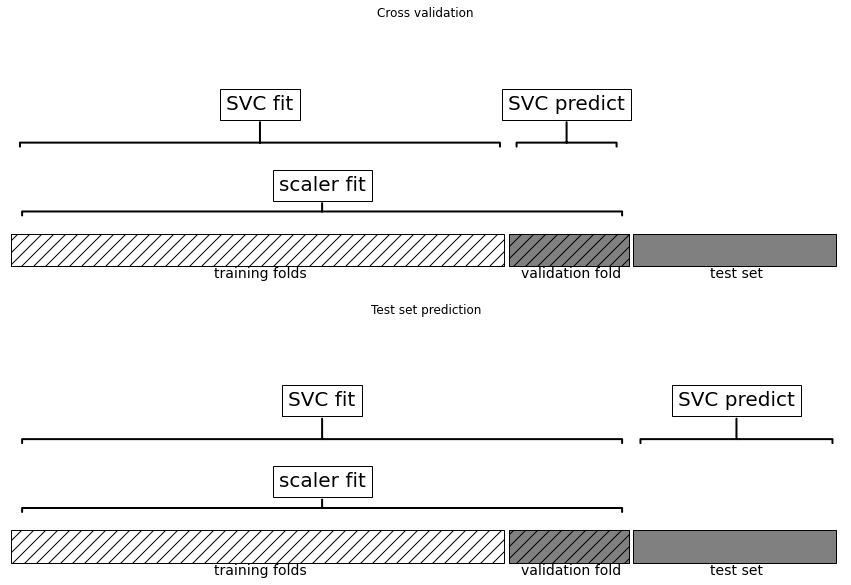

In [12]:
mglearn.plots.plot_improper_processing()

In [16]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.972027972027972

In [17]:
param_grid = {
    'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [18]:
grid.best_score_

0.9812311901504789

In [19]:
grid.score(X_test, y_test)

0.972027972027972

In [20]:
grid.best_params_

{'svm__C': 1, 'svm__gamma': 1}

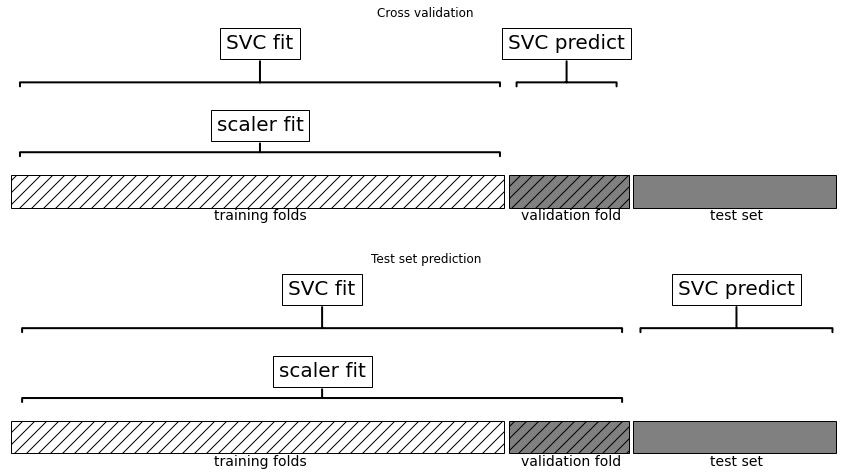

In [21]:
mglearn.plots.plot_proper_processing()

In [25]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

select = SelectPercentile(score_func=f_regression, percentile=5)
select.fit(X, y)

X_selected = select.transform(X)
X_selected.shape

(100, 500)

In [27]:
np.mean(cross_val_score(Ridge(), X_selected, y, cv=5))

0.9057953065239822

In [28]:
pipe = Pipeline([
    ('select', SelectPercentile(score_func=f_regression, percentile=5)),
    ('ridge', Ridge())
])

np.mean(cross_val_score(pipe, X, y, cv=5))

-0.2465542238495281

In [30]:
pipe_long = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm', SVC(C=100))
])
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [31]:
pipe_long.steps

[('scaler', MinMaxScaler()), ('svm', SVC(C=100))]

In [32]:
pipe_short.steps

[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]

In [34]:
pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    StandardScaler()
)

pipe.steps

[('standardscaler-1', StandardScaler()),
 ('pca', PCA(n_components=2)),
 ('standardscaler-2', StandardScaler())]

In [35]:
pipe.fit(cancer.data)

Pipeline(steps=[('standardscaler-1', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('standardscaler-2', StandardScaler())])

In [36]:
components = pipe.named_steps['pca'].components_
components.shape

(2, 30)

In [43]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=100000))
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100]
}

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=4
)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, max_iter=100000))])

In [44]:
grid.best_estimator_.named_steps['logisticregression']

LogisticRegression(C=1, max_iter=100000)

In [45]:
grid.best_estimator_.named_steps['logisticregression'].coef_

array([[-0.43570655, -0.34266946, -0.40809443, -0.5344574 , -0.14971847,
         0.61034122, -0.72634347, -0.78538827,  0.03886087,  0.27497198,
        -1.29780109,  0.04926005, -0.67336941, -0.93447426, -0.13939555,
         0.45032641, -0.13009864, -0.10144273,  0.43432027,  0.71596578,
        -1.09068862, -1.09463976, -0.85183755, -1.06406198, -0.74316099,
         0.07252425, -0.82323903, -0.65321239, -0.64379499, -0.42026013]])

In [47]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0
)

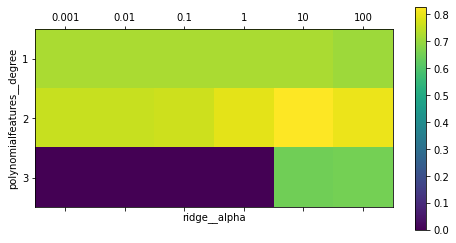

In [52]:
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge()
)
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1), vmin=0, cmap='viridis')

plt.xlabel('ridge__alpha')
plt.ylabel('polynomialfeatures__degree')

plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])), param_grid['polynomialfeatures__degree'])

plt.colorbar()

In [53]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}

In [54]:
grid.score(X_test, y_test)

0.7683045464100128

In [55]:
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

grid.score(X_test, y_test)

0.6272671927504456

In [57]:
pipe = Pipeline([
    ('preprocessing', StandardScaler()),
    ('classifier', SVC())
])

param_grid = [
    {
        'classifier': [SVC()],
        'preprocessing': [StandardScaler(), None],
        'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'classifier': [RandomForestClassifier(n_estimators=100)],
        'preprocessing': [None],
        'classifier': [RandomForestClassifier(n_estimators=100)],
        'preprocessing': [None],
        'classifier__max_features': [1, 2, 3]
    }
]
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier': [SVC(C=10, gamma=0.01)],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'preprocessing': [StandardScaler(), None]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': [1, 2, 3],
                          'preprocessing': [None]}])

In [58]:
grid.best_params_

{'classifier': SVC(C=10, gamma=0.01),
 'classifier__C': 10,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler()}

In [59]:
grid.best_score_

0.9858823529411765

In [60]:
grid.score(X_test, y_test)

0.9790209790209791